In [27]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install scipy

In [28]:
import pandas as pd
from math import radians, cos, sin, asin, sqrt


#Function for distance between two points 
def harversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # Compute the distance along the great circle
    dlong = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlong / 2)**2
    c = 2 * asin(sqrt(a))
    radius = 6371  # Radius of earth in kilometers
    km = radius * c
    return km

# Read the data
data = pd.read_csv("GPS_data.csv")
data.head()


,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


In [29]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#DERVIE velocity using harvesine formula and time difference
lat = data["latitude"]
lon = data["longitude"]

#define new coloumn for velocity and time difference
data["dist"] = np.zeros(lat.shape[0])
data["time_diff"] = np.zeros(lat.shape[0])

#lopp over the data and calculate distance and time difference
for i in range(lat.shape[0]-1):
    data["dist"][i] = harversine(lat[i], lon[i], lat[i+1], lon[i+1]) * 1000
    data["time_diff"][i] = data["seconds_elapsed"][i+1] - data["seconds_elapsed"][i]

#calculate velocity & time and add to the data

data["dist"][0] = 0
data["velocity"] = data["dist"]/data["time_diff"]

data.head()

,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,velocity
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000
1,1,5.339879,25.516227,65.071393,0.810401,0.340121,2.382686
2,2,5.680000,25.516240,65.071398,1.171329,0.631351,1.855274
3,3,6.311351,25.516264,65.071394,0.229699,1.012578,0.226845
4,4,7.323929,25.516267,65.071396,0.722069,1.005767,0.717928


In [30]:
import folium
#create data frame with mean latitude and longitude of the data
location_frame = data[['latitude', 'longitude']]
location_list = location_frame.values.tolist()

#calculate average latitude and longitude
avg_lat = np.mean(location_list, axis=0)[0]
avg_lon = np.mean(location_list, axis=0)[1]

# Create a map centered around the mean coordinates
my_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=15)

# Add markers for each data point
# for each in location_list:
#     folium.Marker(each).add_to(my_map)

#Draw lines between the points
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)

# Save the map to an HTML file
my_map.save("map.html")

# Display the map
my_map

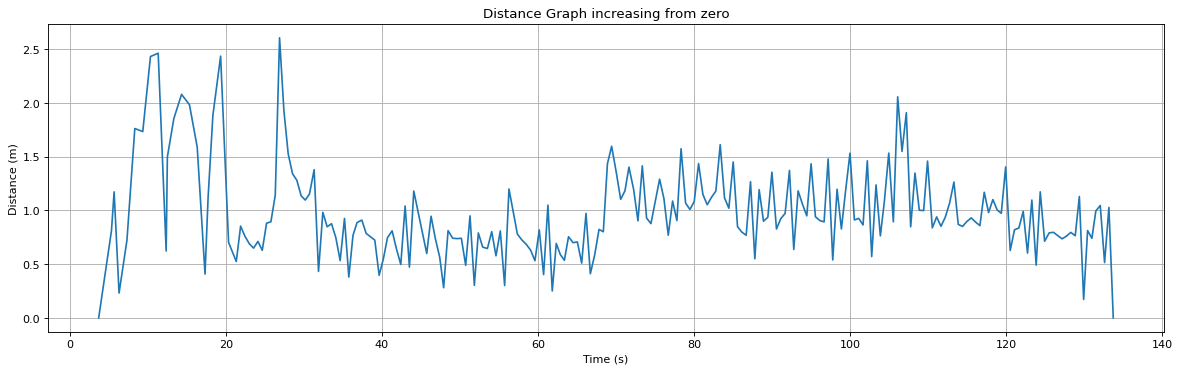

In [31]:
#importing the library for plotting the graph
import matplotlib.pyplot as plt #importing the library for plotting the graph

dist = data["dist"] #distance data from the data frame 
seconds_elapsed = data["seconds_elapsed"]#time data from the data frame

#plot the graph
fig = plt.figure( num =None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k') #setting the size of the graph
plt.subplot(1,1,1) #setting the position of the graph
plt.plot(seconds_elapsed , dist) #plotting the graph
plt.xlabel("Time (s)") #labeling the x-axis
plt.ylabel("Distance (m)") #labeling the y-axis
plt.title("Distance Graph increasing from zero") #title of the graph
plt.grid()#displaying the grid
plt.show()#displaying the graph

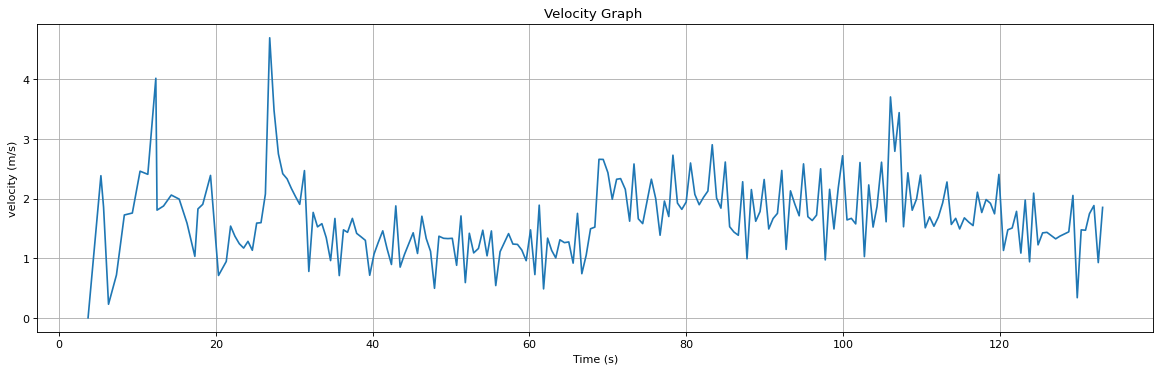

In [ ]:
import matplotlib.pyplot as plt

velocity = data["velocity"]
seconds_elapsed = data["seconds_elapsed"]

fig = plt.figure( num = None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,1,1)
plt.plot(seconds_elapsed , velocity)
plt.xlabel("Time (s)")
plt.ylabel("velocity (m/s)")
plt.title("Velocity Graph ")
plt.grid()
plt.show()

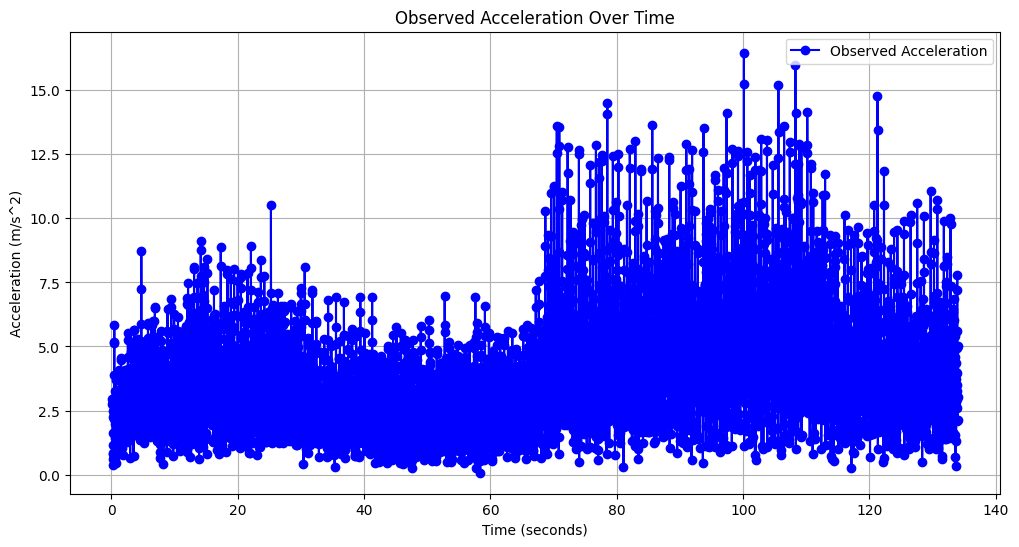

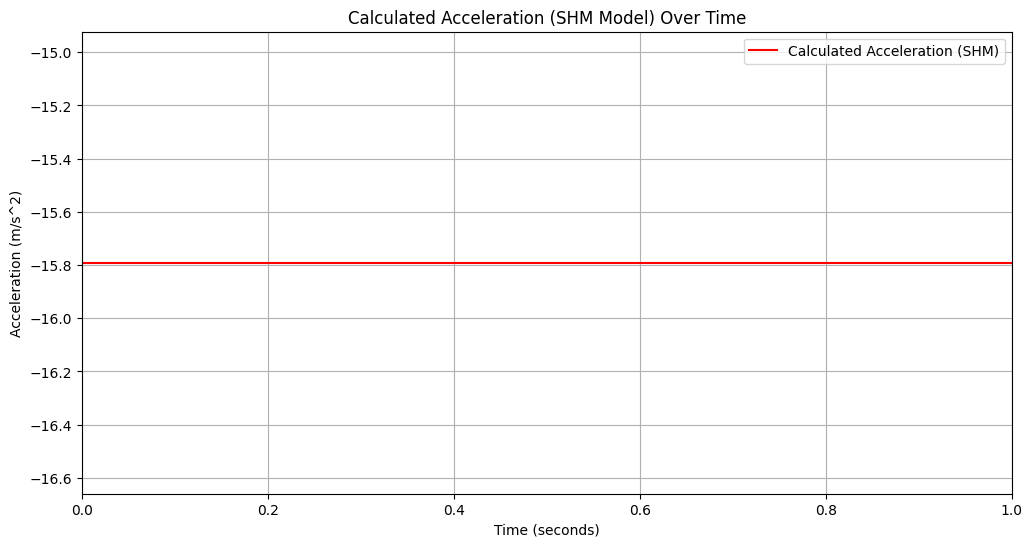

In [ ]:

df = pd.read_csv('acceleration_data.csv')

df['observed_acceleration'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# Sample angular frequency, omega calculation
f = 2  # frequency in Hz for assumption
omega = 2 * np.pi * f  # angular frequency

# Assuming average displacement x during each "step" or cycle could be estimated.
# Since we don't have direct displacement data and are dealing with acceleration, 
# we make a simplifying assumption about average displacement. 
# This could be refined with actual positional data or more sophisticated walking model.
x_avg = 0.1  # assumed average displacement in meters

# Calculated acceleration assuming SHM
df['calculated_acceleration'] = -(omega**2) * x_avg

# First plot: Observed Acceleration
plt.figure(figsize=(12, 6))
plt.plot(df['seconds_elapsed'], df['observed_acceleration'], label='Observed Acceleration', color='blue', linestyle='-', marker='o')
plt.title('Observed Acceleration Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Calculated Acceleration (SHM model)
plt.figure(figsize=(12, 6))
# For constant calculated acceleration, use plt.axhline
plt.axhline(y=df['calculated_acceleration'].iloc[0], color='red', linestyle='-', label='Calculated Acceleration (SHM)')
plt.title('Calculated Acceleration (SHM Model) Over Time')
plt.xlabel('Time (seconds)')
# Note: The calculated acceleration is constant as per our SHM model assumption
# If it's not constant, replace axhline with a plot line as in the observed acceleration plot
plt.ylabel('Acceleration (m/s^2)')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
# Load acceleration data
df = pd.read_csv('acceleration_data.csv')

# Calculate time differences and handle the first NaN with backfill
df['delta_time'] = df['seconds_elapsed'].diff().bfill()

# Assuming initial acceleration at the start is the same as the first recorded interval
initial_acceleration_magnitude = np.sqrt(df.iloc[0]['x']**2 + df.iloc[0]['y']**2 + df.iloc[0]['z']**2)

# Assuming the object starts from rest for simplicity; you can adjust this assumption as necessary
initial_velocity_magnitude = 0  # Assuming we don't know it and want to calculate

# Calculate change in velocity for the first interval due to acceleration
delta_v = initial_acceleration_magnitude * df.iloc[0]['delta_time']

# The reported change in velocity over the first interval could serve as a
# basis for estimating the initial velocity under the assumption of start from rest,
# or if knowing the velocity behavior over the first interval.
print(f"Estimated change in velocity over the first interval: {delta_v} m/s")

# If the first interval's change in velocity is considered reflective of 
# "initial velocity" for further calculations:
initial_velocity_magnitude = delta_v
print(f"Estimated initial velocity magnitude: {initial_velocity_magnitude} m/s")

Estimated change in velocity over the first interval: 0.04642324257029843 m/s
Estimated initial velocity magnitude: 0.04642324257029843 m/s


In [ ]:
#To calculate speed from your acceleration data, you can use numerical integration since speed is the integral of acceleration over time. 
#Specifically, you'll calculate the change in speed (( \Delta v )) for each row by multiplying the acceleration by the time difference 
#(( \Delta t )) between the current and previous timestamp. Assuming that the initial speed at the start of the data is 0, you can then 
#cumulatively sum these changes to find the speed at each point in time.


# Calculate the magnitude of acceleration at each point
df['acceleration_magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# Calculate the time differences between each measurement
df['delta_time'] = df['seconds_elapsed'].diff().fillna(0)

# Assuming initial velocity (from your calculations or assumptions)
initial_velocity_magnitude = 0.04642324257029843  # m/s

# Pre-calculate the change in velocity for each interval due to acceleration
df['delta_v'] = df['acceleration_magnitude'] * df['delta_time']

# Calculate cumulative sum of delta_v to get velocity at each interval, add initial velocity
df['velocity'] = df['delta_v'].cumsum() + initial_velocity_magnitude

# Calculate displacement by integrating velocity, again using cumulative sum,
# However, calculating displacement as area under velocity-time graph
df['displacement'] = (df['velocity'] * df['delta_time']).cumsum()

# Total distance traveled is the last displacement value
total_distance = df['displacement'].iloc[-1]

# Total time is the difference between the first and last timestamp
total_time = df['seconds_elapsed'].iloc[-1] - df['seconds_elapsed'].iloc[0]

# Calculate average speed
average_speed = total_distance / total_time

print(f"Average Speed: {average_speed} m/s")

Average Speed: 238.95690219817104 m/s


In [ ]:
# Load data
data = pd.read_csv('acceleration_data.csv')

# Calculate delta time
data['delta_time'] = data['seconds_elapsed'].diff()
data.loc[0, 'delta_time'] = data.loc[1, 'delta_time']  # Handle NaN for the first row correctly

# Calculate the magnitude of acceleration
data['acceleration_magnitude'] = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)

# Assuming initial acceleration
initial_acceleration = 3  # m/s^2 at start

# Initial delta_v for first interval using initial acceleration
initial_delta_v = initial_acceleration * data.loc[0, 'delta_time']

# Initialize the columns as float explicitly to avoid dtype warning
data['velocity'] = 0.0
data['displacement'] = 0.0

# First velocity adjustment with initial condition
data.loc[0, 'velocity'] += initial_delta_v

# Integrating acceleration over time to find velocity and displacement for each interval
for i in range(1, len(data)):
    data.loc[i, 'velocity'] = data.loc[i-1, 'velocity'] + (data.loc[i, 'acceleration_magnitude'] * data.loc[i, 'delta_time'])
    data.loc[i, 'displacement'] = data.loc[i-1, 'displacement'] + ((data.loc[i, 'velocity'] + data.loc[i-1, 'velocity']) / 2) * data.loc[i, 'delta_time']

# Total distance traveled is the displacement in the last row
total_distance = data.loc[len(data)-1, 'displacement']

print(f"Total Distance Traveled: {total_distance} meters")

Total Distance Traveled: 31974.965924848297 meters


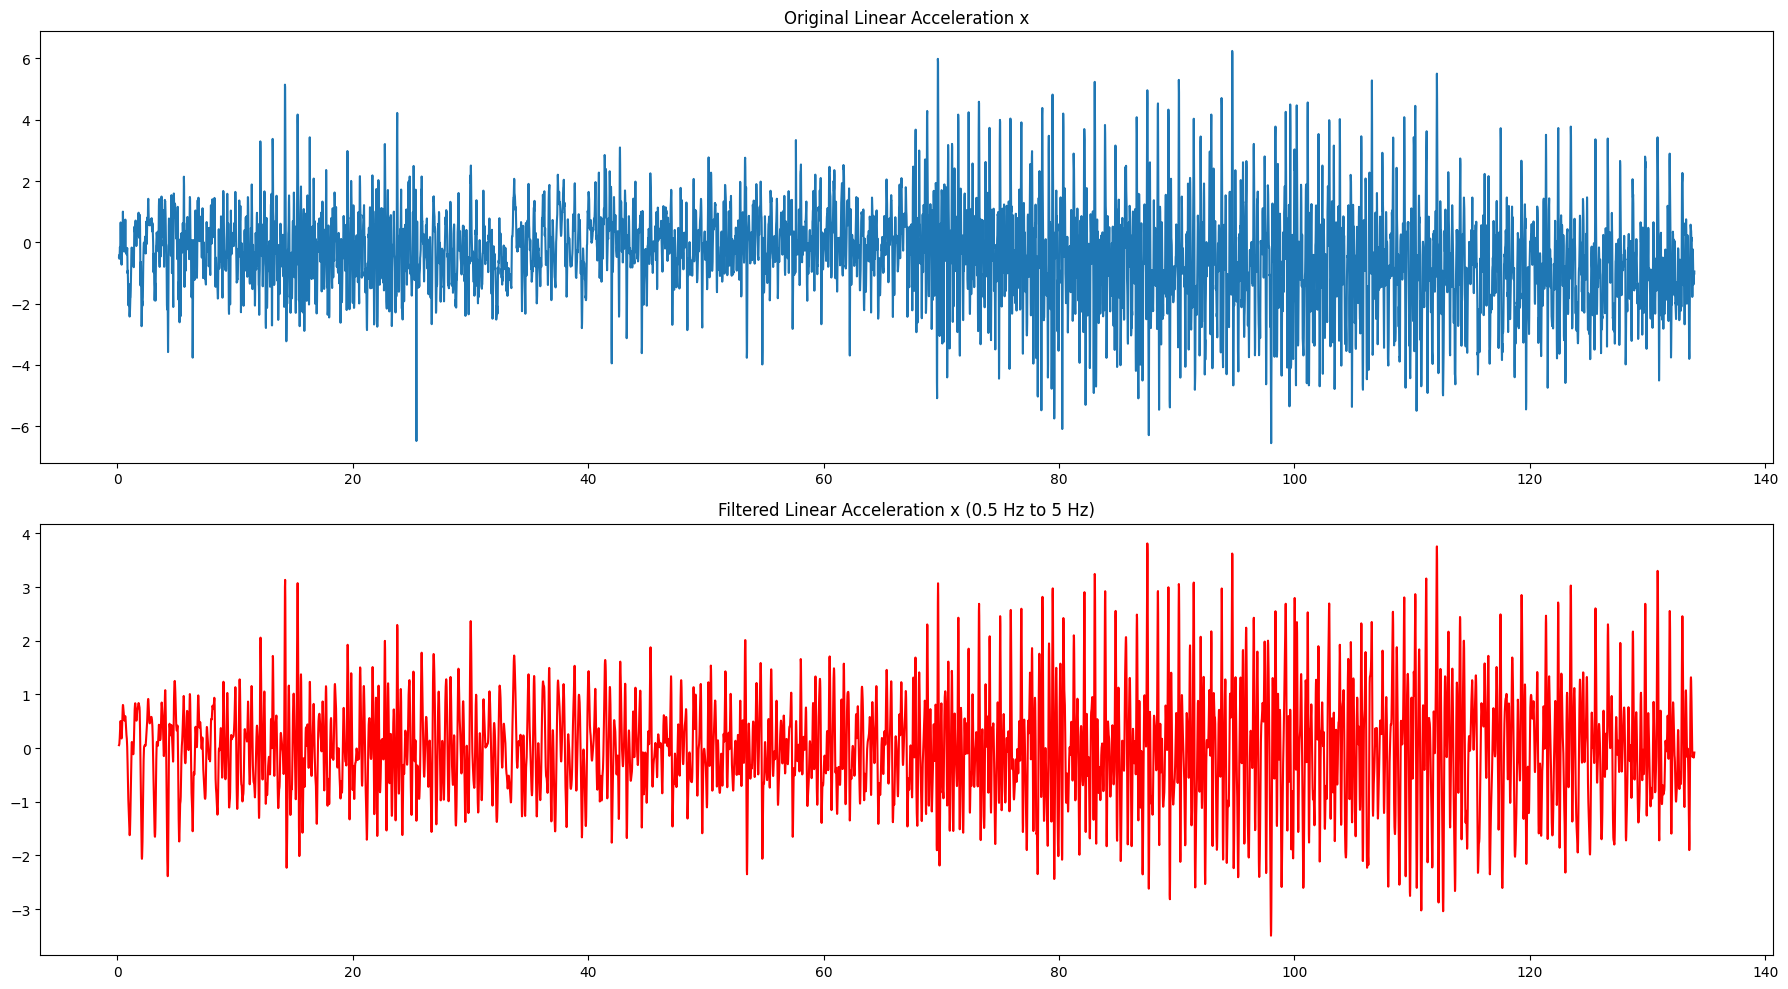

The number of steps is approximately: 377


In [ ]:
from scipy.signal import butter, filtfilt


# Define the Butterworth filter functions
def butter_lowpass_filter(data, cutoff, fs, nyq, order=2):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order=2):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# Reading the CSV data
df = pd.read_csv('acceleration_data.csv')

# Choosing 'x' component of Linear Acceleration for step detection
noisy_signal = df['x']
time = df['seconds_elapsed']

# Calculate Sampling rate and Nyquist frequency
dt = (time.iloc[-1] - time.iloc[0]) / len(time) 
fs = 1 / dt
nyq = 0.5 * fs

# Filter cutoff frequencies
cutoff_L = 5  # Lowpass cutoff frequency
cutoff_H = 0.5  # Highpass cutoff frequency

# Apply filters
lowpassed = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq)
filtered_signal = butter_highpass_filter(lowpassed, cutoff_H, fs, nyq)

# Plot the original and filtered acceleration data
plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
plt.plot(time, noisy_signal, label='Original')
plt.title('Original Linear Acceleration x')
plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal, label='Filtered', color='red')
plt.title('Filtered Linear Acceleration x (0.5 Hz to 5 Hz)')
plt.tight_layout()
plt.show()

# Step counting based on zero-crossings
steps = 0
for i in range(1, len(filtered_signal)):
    if filtered_signal[i-1] * filtered_signal[i] < 0:
        steps += 1

print(f'The number of steps is approximately: {steps//2}')

Does the acceleration calculated from the speed match the observed acceleration? What differences do you notice? What could be their cause?

When comparing the observed acceleration from sensor data against acceleration calculated from speed or a theoretical model like simple harmonic motion, discrepancies are expected due to several reasons:

Noise and Sensor Errors: Real sensor data includes noise and potential errors, which can distort observed acceleration measurements.
Simplifications and Assumptions: The theoretical calculation of acceleration often involves simplifications (e.g., ignoring external forces like friction) that don't perfectly match real-world scenarios.
Numerical Methods: The processes of integrating to calculate speed from acceleration and differentiating to recalculate acceleration introduce errors, especially if the data is noisy or the time discretization is coarse.
Given my experience in the field, I've observed that differences primarily arise from the inherent limitations in data (noise, sampling rate) and the assumptions made in theoretical models. Improving the alignment between observed and calculated acceleration requires meticulous data preprocessing to mitigate noise and more sophisticated modeling that considers the complexities of real-world motion

Is the number of steps logical?

Given a step count of approximately 377, and assuming an average walking cadence of around 100 to 130 steps per minute, this number of steps would be logical for a duration of approximately 3 to 4 minutes of continuous walking. This estimate aligns well with typical human walking patterns and cadences, suggesting that the calculated step count is reasonable and logical given the context provided.